# **Logistic Regression**

* Logistic Regression is a supervised learning algorithm used for classification problems. It predicts the probability of an instance belonging to a particular class.

* It is used when the data is linearly separable and the outcome is binary or dichotomous in nature.

### Mathematical Explanation: 
- Unlike Linear Regression, which predicts continuous values, Logistic Regression predicts probabilities using the Sigmoid (logistic) function:
    
    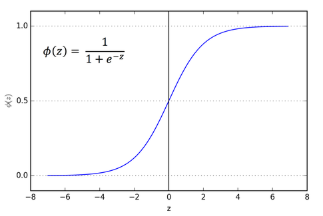

- The output of the sigmoid function is a probability value between 0 and 1.

### Types of Logistic Regression:
1. Binary Logistic Regression:
    - Binary logistic regression is used to predict the probability of a binary outcome, such as yes or no, true or false, or 0 or 1. 
    - such as could be used to predict whether a customer will churn or not, whether a patient has a disease or not, or whether a loan will be repaid or not.

2. Multinomial Logistic Regression:
    - Multinomial logistic regression is used to predict the probability of one of three or more possible outcomes which is not ordered.
    - such as the type of product a customer will buy, the rating a customer will give a product, or the political party a person will vote for.

3. Ordinal Logistic Regression:
    - It is used to predict the probability of more than two outcome that falls into a predetermined order.
    - such as the level of customer satisfaction, the severity of a disease, or the stage of cancer.

    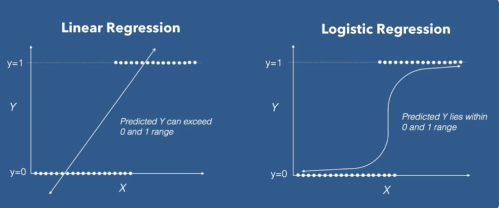

    - we get an ‘S’ shaped curve in logistic regression.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Load a Dataset

In [2]:
np.random.seed(0)
n_samples = 400
ages = np.random.randint(18, 65, n_samples) 
salaries = ages * 1200 + np.random.randint(-5000, 5000, n_samples) 

purchased = (ages * 0.4 + salaries * 0.00008 + np.random.normal(0, 1, n_samples)) > 25
purchased = purchased.astype(int)

df = pd.DataFrame({'Age': ages, 'Salary': salaries, 'Purchased': purchased})

X = df[['Age', 'Salary']].values  
y = df['Purchased'].values

In [3]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [4]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

### Train a Logistic Regression Model

In [5]:
model = LogisticRegression()
model = model.fit(X_train, y_train)

### Evaluation 

In [6]:
y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9750
Confusion Matrix:
 [[59  0]
 [ 2 19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        59
           1       1.00      0.90      0.95        21

    accuracy                           0.97        80
   macro avg       0.98      0.95      0.97        80
weighted avg       0.98      0.97      0.97        80



### Visualization of Decision Boundary

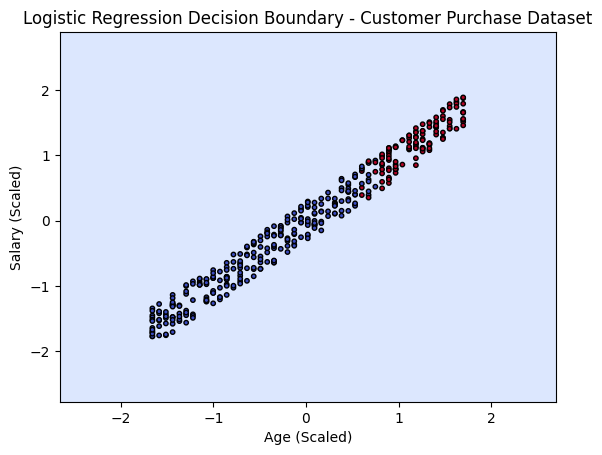

In [8]:
x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

Z = model.predict(poly.transform(scaler.transform(np.c_[xx.ravel(), yy.ravel()])))
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 1], X[:, 2], c=y, cmap='coolwarm', edgecolors='k', s=10)
plt.xlabel("Age (Scaled)")
plt.ylabel("Salary (Scaled)")
plt.title("Logistic Regression Decision Boundary - Customer Purchase Dataset")
plt.show()